In [ ]:
from google.colab import files
import pandas as pd

# آپلود فایل CSV
uploaded = files.upload()

# اسم فایل آپلود شده رو بگیر (اولین فایل)
filename = list(uploaded.keys())[0]

# خواندن داده
df = pd.read_csv(filename)

# حذف ستون id اگر وجود داشت
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("ستون 'id' حذف شد.")
else:
    print("ستون 'id' در داده وجود ندارد.")

# نمایش 5 سطر اول
print(df.head())

# نمایش اطلاعات کلی
print(df.info())


Saving Car_Insurance_Claim 1.csv to Car_Insurance_Claim 1.csv
ستون 'id' در داده وجود ندارد.
       ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0    upper class      0.629027                  1   after 2015        0   
1        poverty      0.357757                  0  before 2015        0   
2  working class      0.493146                  1  before 2015        0   
3  working class      0.206013                  1  before 2015        0   
4  working class      0.388366                  1  before 2015        0   

   CHILDREN  POSTAL_CODE  ANNUAL_MIL

In [ ]:
print(df.columns)


Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')


In [ ]:
# آمار توصیفی متغیرهای عددی
print("آمار توصیفی متغیرهای عددی:")
print(df.describe())

# تعداد مقادیر گمشده در هر ستون
print("\nتعداد مقادیر گمشده در هر ستون:")
print(df.isnull().sum())

# بررسی نوع داده متغیرها
print("\nنوع داده هر ستون:")
print(df.dtypes)

# بررسی توزیع متغیر هدف OUTCOME
print("\nتوزیع متغیر هدف OUTCOME:")
print(df['OUTCOME'].value_counts())


آمار توصیفی متغیرهای عددی:
                  ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   10000.000000   9018.000000       10000.000000  10000.000000   
mean   500521.906800      0.515813           0.697000      0.498200   
std    290030.768758      0.137688           0.459578      0.500022   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.417191           0.000000      0.000000   
50%    501777.000000      0.525033           1.000000      0.000000   
75%    753974.500000      0.618312           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  10000.000000  10000.000000     9043.000000         10000.000000   
mean       0.688800  19864.548400    11697.003207             1.482900   
std        0.463008  18915.613855     2818.434528             2.241966   
min        0.000000  10238.000000    

In [ ]:
import numpy as np

# شناسایی ستون‌های عددی
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("ستون‌های عددی برای بررسی پرت‌ها:", num_cols)

# تعریف تابع حذف پرت
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_count = data.shape[0]
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        after_count = data.shape[0]
        print(f"حذف پرت‌ها در ستون {col} - تعداد حذف شده: {before_count - after_count}")

    return data

# حذف پرت‌ها
df_clean = remove_outliers(df, num_cols)

print(f"\nتعداد نمونه‌ها قبل از حذف پرت: {df.shape[0]}")
print(f"تعداد نمونه‌ها بعد از حذف پرت: {df_clean.shape[0]}")


ستون‌های عددی برای بررسی پرت‌ها: ['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']
حذف پرت‌ها در ستون ID - تعداد حذف شده: 0
حذف پرت‌ها در ستون CREDIT_SCORE - تعداد حذف شده: 991
حذف پرت‌ها در ستون VEHICLE_OWNERSHIP - تعداد حذف شده: 0
حذف پرت‌ها در ستون MARRIED - تعداد حذف شده: 0
حذف پرت‌ها در ستون CHILDREN - تعداد حذف شده: 0
حذف پرت‌ها در ستون POSTAL_CODE - تعداد حذف شده: 429
حذف پرت‌ها در ستون ANNUAL_MILEAGE - تعداد حذف شده: 842
حذف پرت‌ها در ستون SPEEDING_VIOLATIONS - تعداد حذف شده: 482
حذف پرت‌ها در ستون DUIS - تعداد حذف شده: 1235
حذف پرت‌ها در ستون PAST_ACCIDENTS - تعداد حذف شده: 650
حذف پرت‌ها در ستون OUTCOME - تعداد حذف شده: 0

تعداد نمونه‌ها قبل از حذف پرت: 10000
تعداد نمونه‌ها بعد از حذف پرت: 5371


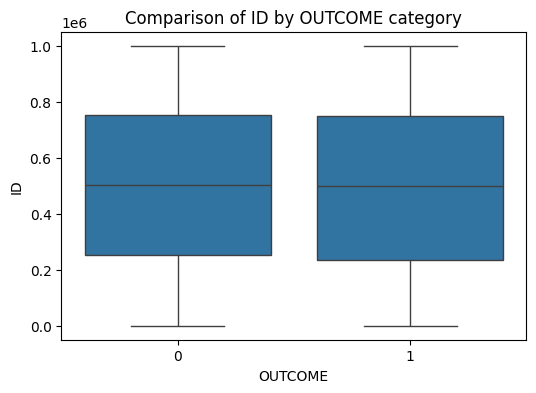

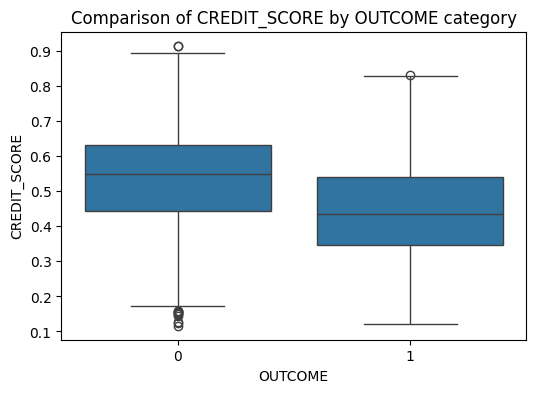

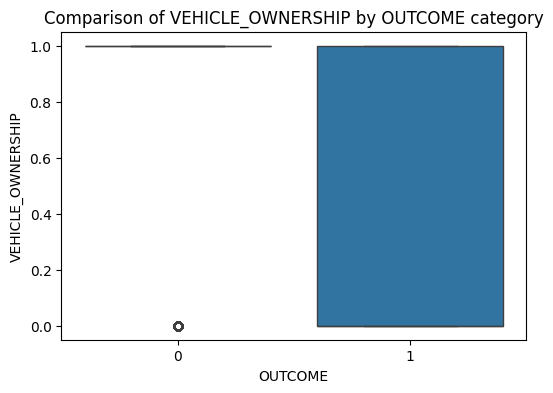

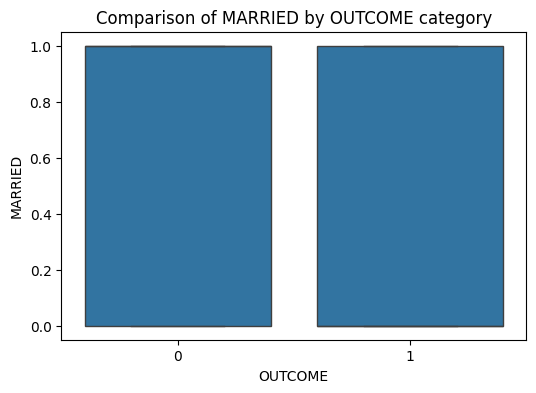

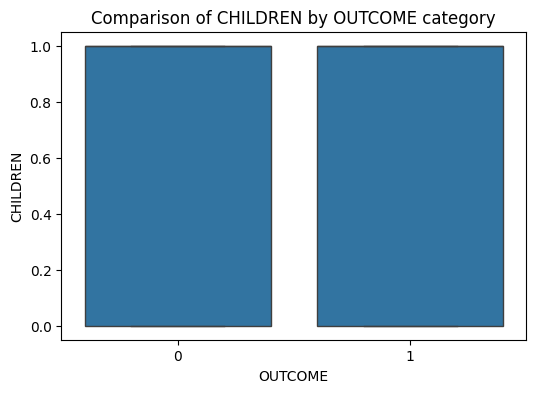

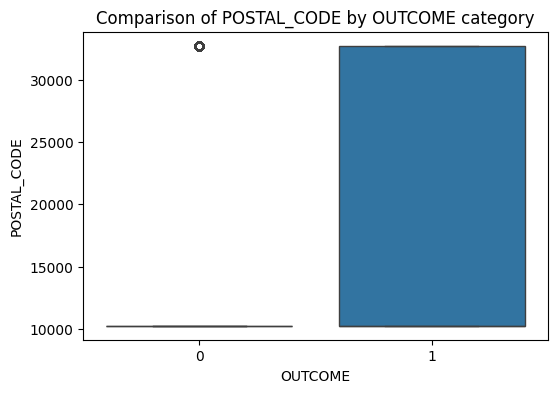

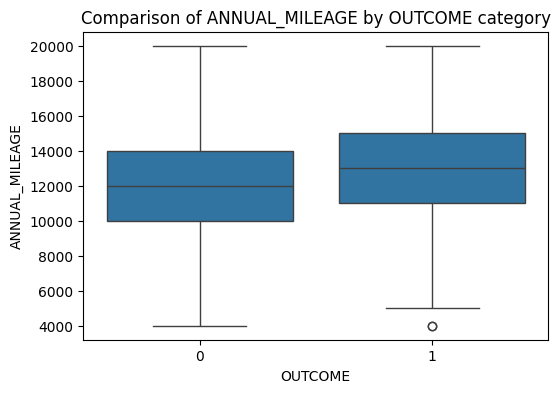

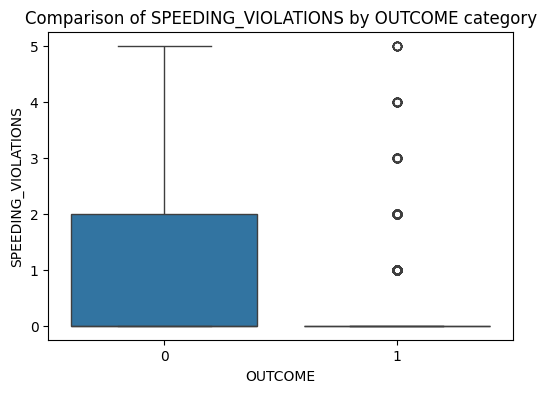

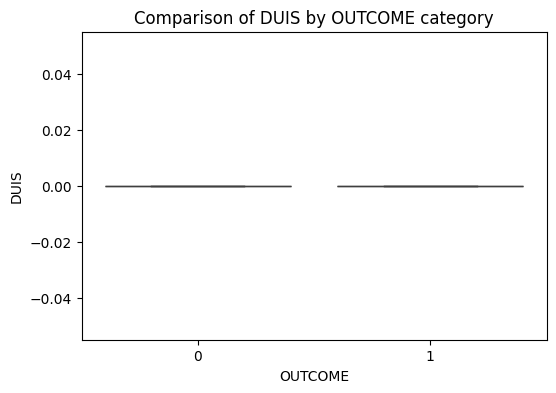

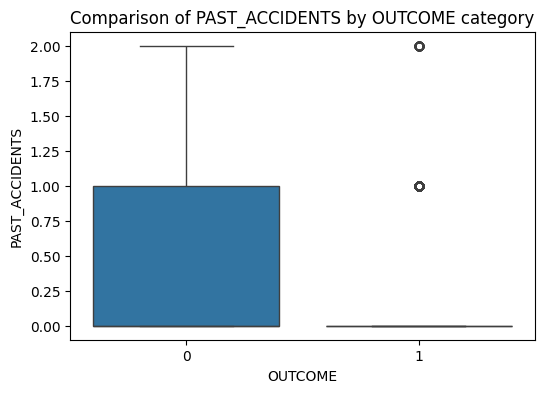

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# اگر 'OUTCOME' در لیست است، حذفش کن
if 'OUTCOME' in num_cols:
    num_cols.remove('OUTCOME')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='OUTCOME', y=col, data=df_clean)
    plt.title(f'Comparison of {col} by OUTCOME category')
    plt.show()



In [ ]:
# شناسایی ستون‌های غیر عددی
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("ستون‌های غیرعددی:", cat_cols)

# تبدیل با One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

print(f"تعداد ستون‌ها قبل از تبدیل: {df_clean.shape[1]}")
print(f"تعداد ستون‌ها بعد از تبدیل: {df_encoded.shape[1]}")


ستون‌های غیرعددی: ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
تعداد ستون‌ها قبل از تبدیل: 19
تعداد ستون‌ها بعد از تبدیل: 26


In [ ]:
from sklearn.model_selection import train_test_split

# تقسیم داده به X و y
X = df_encoded.drop(columns=['OUTCOME'])
y = df_encoded['OUTCOME']

# تقسیم به داده آموزش و تست (مثلاً ۷۰ درصد آموزش و ۳۰ درصد تست)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"اندازه داده آموزش: {X_train.shape}")
print(f"اندازه داده تست: {X_test.shape}")


اندازه داده آموزش: (3759, 25)
اندازه داده تست: (1612, 25)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("توزیع برچسب‌ها قبل از SMOTE:")
print(y_train.value_counts())

print("\nتوزیع برچسب‌ها بعد از SMOTE:")
print(y_train_res.value_counts())


توزیع برچسب‌ها قبل از SMOTE:
OUTCOME
0    2261
1    1498
Name: count, dtype: int64

توزیع برچسب‌ها بعد از SMOTE:
OUTCOME
1    2261
0    2261
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# ساخت مدل و آموزش
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

# پیش‌بینی روی داده تست
y_pred_dt = dt.predict(X_test)

# ارزیابی
print("درخت تصمیم - دقت:", accuracy_score(y_test, y_pred_dt))
print("درخت تصمیم - ماتریس ابهام:\n", confusion_matrix(y_test, y_pred_dt))
print("درخت تصمیم - گزارش طبقه‌بندی:\n", classification_report(y_test, y_pred_dt))


درخت تصمیم - دقت: 0.7487593052109182
درخت تصمیم - ماتریس ابهام:
 [[755 214]
 [191 452]]
درخت تصمیم - گزارش طبقه‌بندی:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       969
           1       0.68      0.70      0.69       643

    accuracy                           0.75      1612
   macro avg       0.74      0.74      0.74      1612
weighted avg       0.75      0.75      0.75      1612



Feature importances in the Decision Tree model:
VEHICLE_OWNERSHIP            0.214609
ID                           0.130608
CREDIT_SCORE                 0.121855
PAST_ACCIDENTS               0.105200
VEHICLE_YEAR_before 2015     0.074599
ANNUAL_MILEAGE               0.063805
POSTAL_CODE                  0.054091
GENDER_male                  0.051451
SPEEDING_VIOLATIONS          0.031261
DRIVING_EXPERIENCE_10-19y    0.030671
dtype: float64


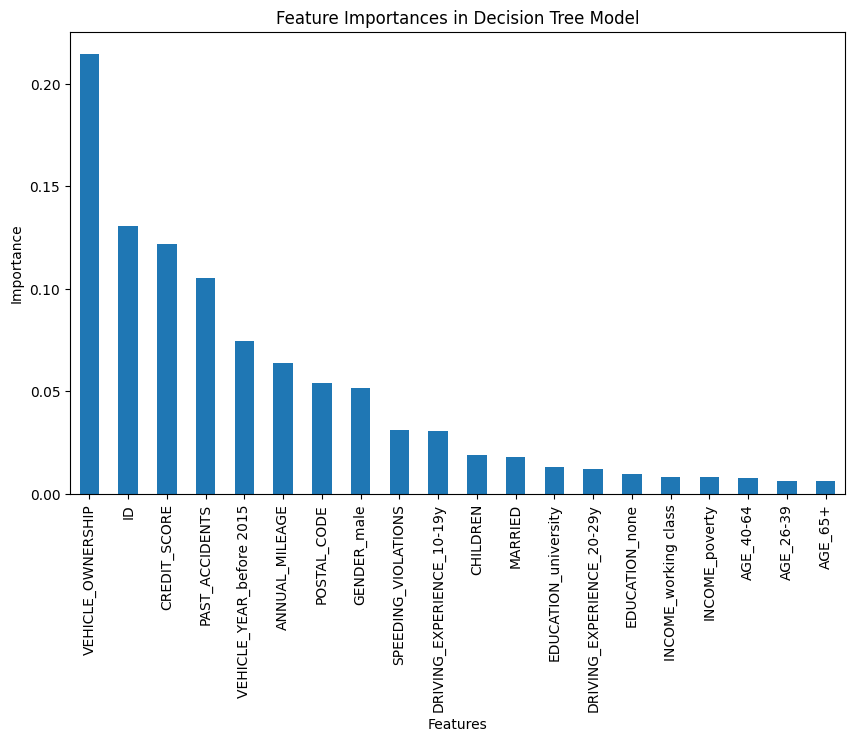

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = dt.feature_importances_

# Create a DataFrame for sorting and displaying
feat_importances = pd.Series(importances, index=X_train_res.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print("Feature importances in the Decision Tree model:")
print(feat_importances.head(10))  # Show top 10 important features

# Plot feature importances
plt.figure(figsize=(10,6))
feat_importances.head(20).plot(kind='bar')
plt.title('Feature Importances in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [ ]:
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=5,       # کمتر از 20
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train_res, y_train_res)

y_pred_svm = svm.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("SVM with default parameters - Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM with default parameters - Accuracy: 0.5316377171215881
Confusion Matrix:
 [[590 379]
 [376 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61       969
           1       0.41      0.42      0.41       643

    accuracy                           0.53      1612
   macro avg       0.51      0.51      0.51      1612
weighted avg       0.53      0.53      0.53      1612



In [ ]:
param_dist = {
    'C': stats.uniform(0.1, 10),
    'kernel': ['linear'],   # فقط یک kernel
    'gamma': ['scale']
}
